/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:677: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from current font.


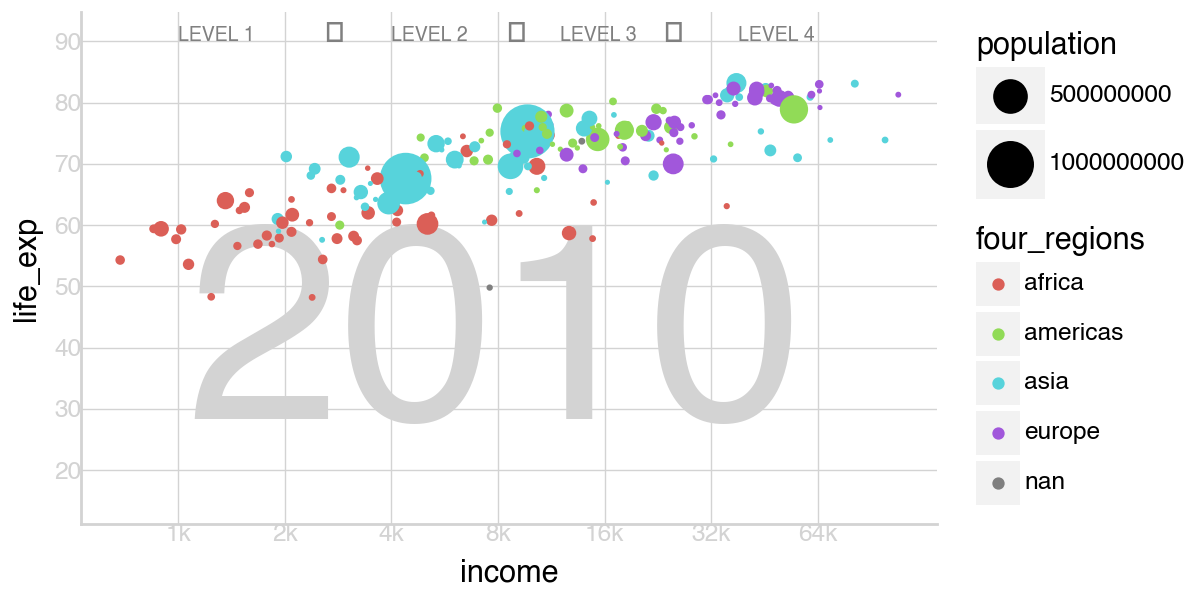

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


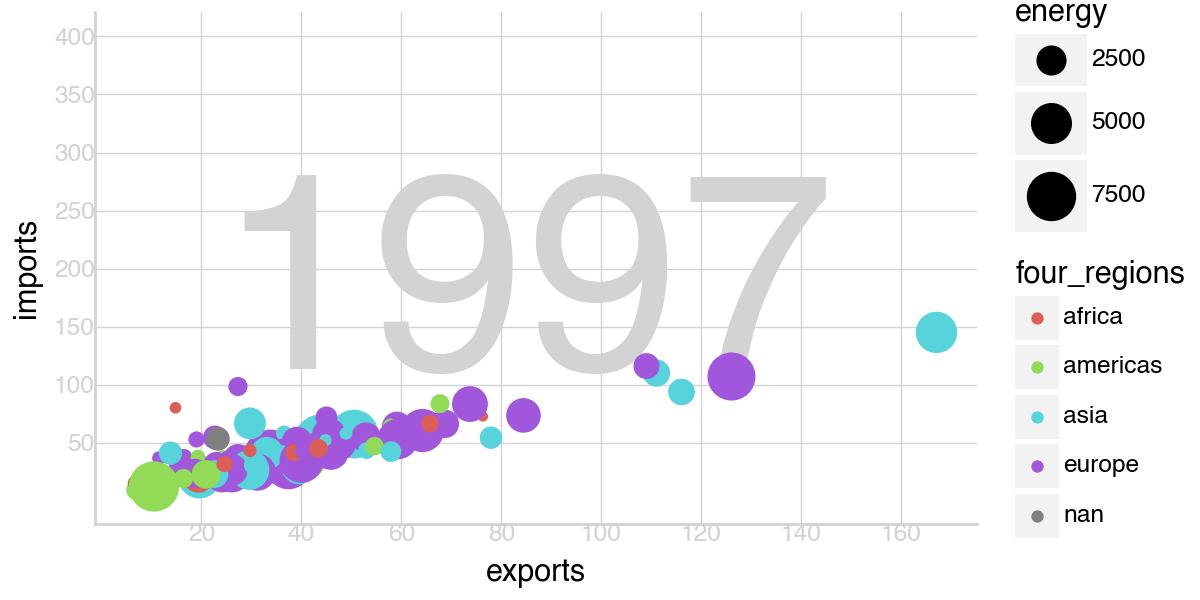

In [96]:
#libraries
from plotnine import scale_x_continuous, scale_y_continuous, annotate, theme, element_blank, element_rect, element_line, element_text, labs
import pandas as pd
import plotnine as p9

In [2]:
#read in data

#gets directory
#current_directory = os.getcwd()

#lists all directory options from current directory
#files = os.listdir(current_directory)

q1 = pd.read_csv('data/q1data.csv')
q2 = pd.read_csv('data/q2data.csv')
q3 = pd.read_csv('data/q3data.csv')

**Task 1**

![image info](plots/plot1.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

2. Import the q1data.csv dataset.

3. Recreate the plot as best you can using plotnine.

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:677: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from current font.


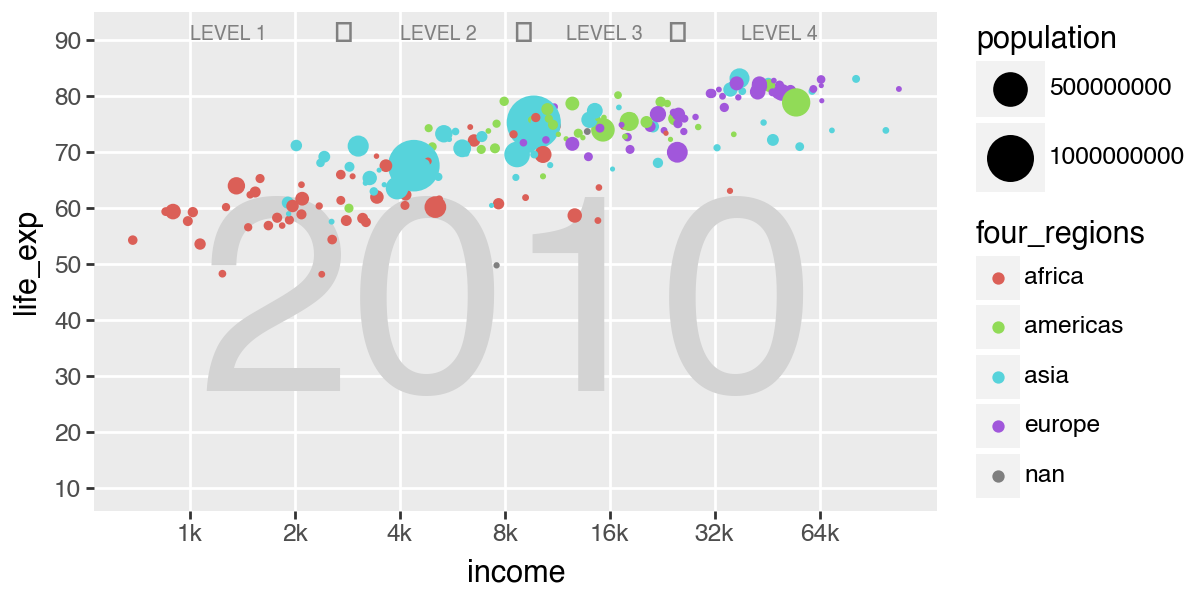

In [48]:
#x = income
    #subsections having income level 1-4 on the top
#y = life expectancy
#color is world region
#size is population

#bar on the right that lets you search country

#year is 2010

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:677: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from current font.


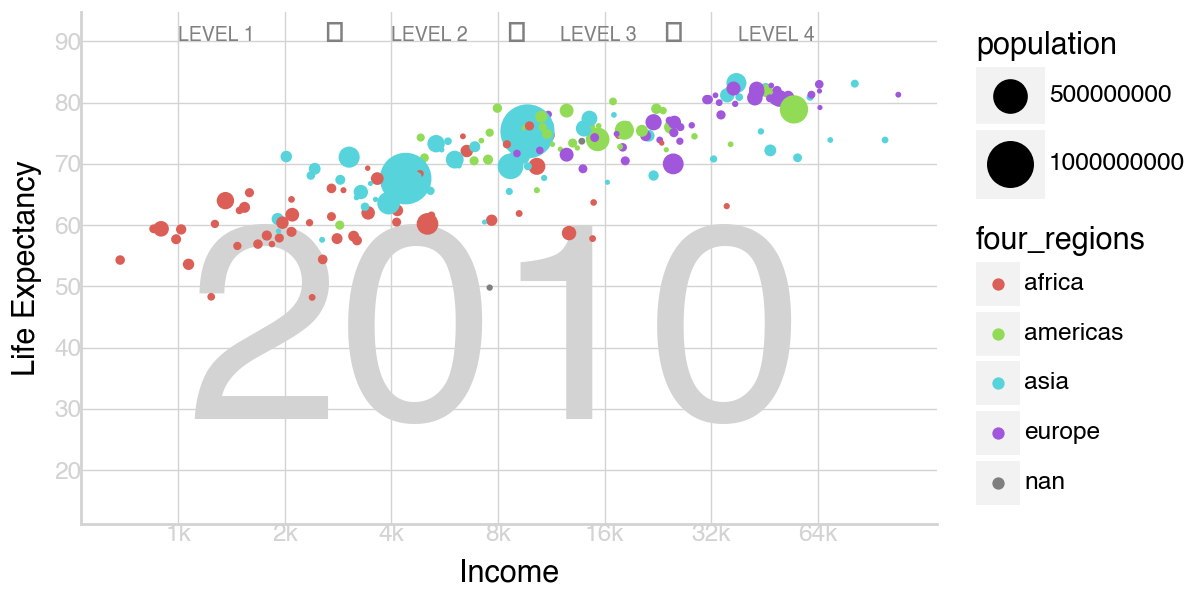

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


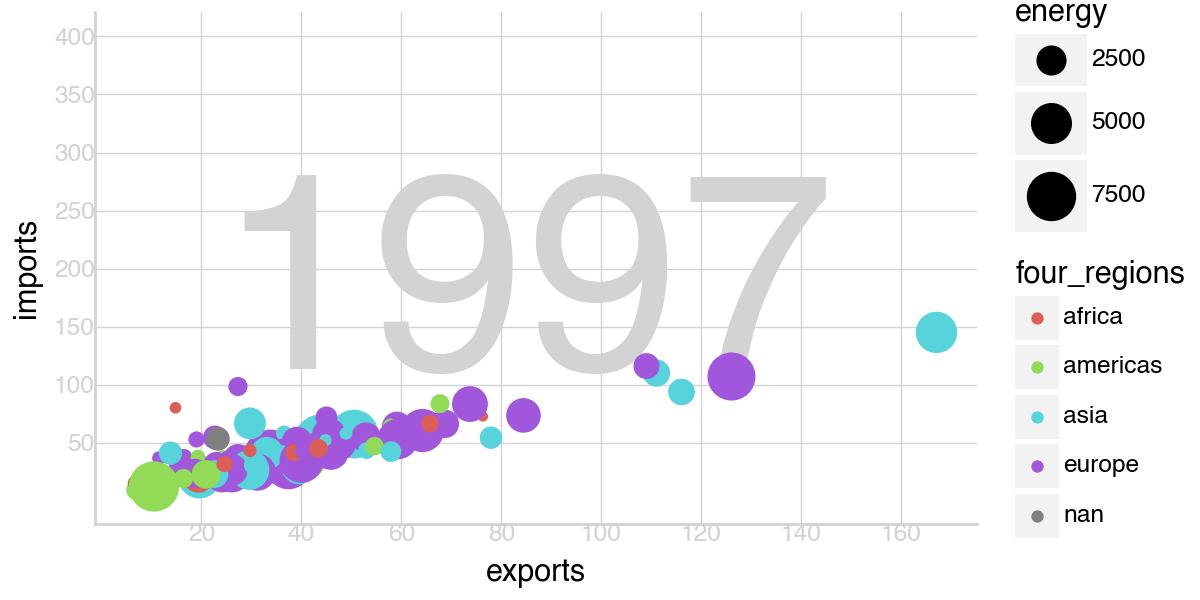

In [97]:
plot = (p9.ggplot(data = q1, 
           mapping = p9.aes(x = 'income',
                            y = 'life_exp',
                            size = 'population',
                            color = 'four_regions')) 
   
    #if we put the annotations first, it will put it behind the points
    #adds income levels using annotate
    + annotate('text', x=1000, y=91, label='LEVEL 1', color = 'grey', size=7, ha='left')
    + annotate('text', x=4000, y=91, label='LEVEL 2', color = 'grey', size=7, ha='left')
    + annotate('text', x=12000, y=91, label='LEVEL 3', color = 'grey', size=7, ha='left')
    + annotate('text', x=38000, y=91, label='LEVEL 4', color = 'grey', size=7, ha='left')
    
    #add diamond seperators
    + annotate('text', x=2750, y=91, label='◆', color='grey', size=10)
    + annotate('text', x=9000, y=91, label='◆', color='grey', size=10)
    + annotate('text', x=25000, y=91, label='◆', color='grey', size=10)
    
    # add year in the background using annotate
    #+ annotate('text', x=900, y=40, label='2', size=100, color='lightgrey', ha='left')
    #+ annotate('text', x=3000, y=40, label='0', size=100, color='lightgrey', ha='left')
    #+ annotate('text', x=9000, y=40, label='1', size=100, color='lightgrey', ha='left')
    #+ annotate('text', x=22000, y=40, label='0', size=100, color='lightgrey', ha='left')
    + annotate('text', x=1050, y=40, label='2010', size=100, color='lightgrey', ha='left')

    + p9.geom_point()
    + p9.scale_size(range=(0, 10))

    # wanted a discrete scale for the axis but was not able to do it 
    # So logging made it look more like the graph
    # in order to transform, couldn't include 0 and 500 b/c the lowest income is already > 500?
    + scale_x_continuous(
        trans = 'log10',
        breaks= [1000, 2000, 4000, 8000, 16000, 32000, 64000],
        labels=['1k', '2k', '4k', '8k', '16k', '32k', '64k']
    )
    # need to make y axis 10-90
    #refrenced GPT
    + scale_y_continuous(
        #sets y access to 10-90
        limits=(15, 91),
        #ensures that it's evenly spaced every 10 units
        breaks=range(20, 91, 10)
    )
    #adds x and y titles
    + labs(x = 'Income', y = 'Life Expectancy')
    + theme(
        #removes all the small lines
        panel_grid_minor=element_blank(),
        # Set background to white
        panel_background=element_rect(fill='white'),  
         # Grey major grid lines
        panel_grid_major=element_line(color='lightgrey', size=0.5),  
        #brings back x axis
        axis_line_x=element_line(color='lightgrey', size=1),
        #brings back y axis
        axis_line_y=element_line(color='lightgrey', size=1),
        # Change x-axis labels to light grey, tried to add margins but it doesn't do anything
        axis_text_x=element_text(color='lightgrey', margin={'b':5}), 
        # Change y-axis labels to light grey 
        axis_text_y=element_text(color='lightgrey', margin={'l':5}),  
        axis_ticks_major=element_blank(),  # Remove major tick marks
        #axis_ticks_minor=element_blank(),  # Remove minor tick marks
        #fixes ratio of image
        figure_size=(6, 3)
    )
)

**Task 2**

![image info](plots/plot2.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

2. Import the q2data.csv dataset.

3. Recreate the plot as best you can using plotnine.

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

In [59]:
#x = exports % GDP
#y = imports % GDP
#size is energy
#color is world region


#bar on the right that lets you search country
#year is 1997


#remove nan values
q2 = q2.dropna(subset=['exports', 'imports', 'energy'])

#check data types
print(q2.dtypes)

#convert energy to numeric
q2['energy'] = pd.to_numeric(q2['energy'], errors='coerce')

imports              float64
exports              float64
energy               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object
imports              float64
exports              float64
energy               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


<positron-console-cell-102>:29: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-102>:29: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-102>:52: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


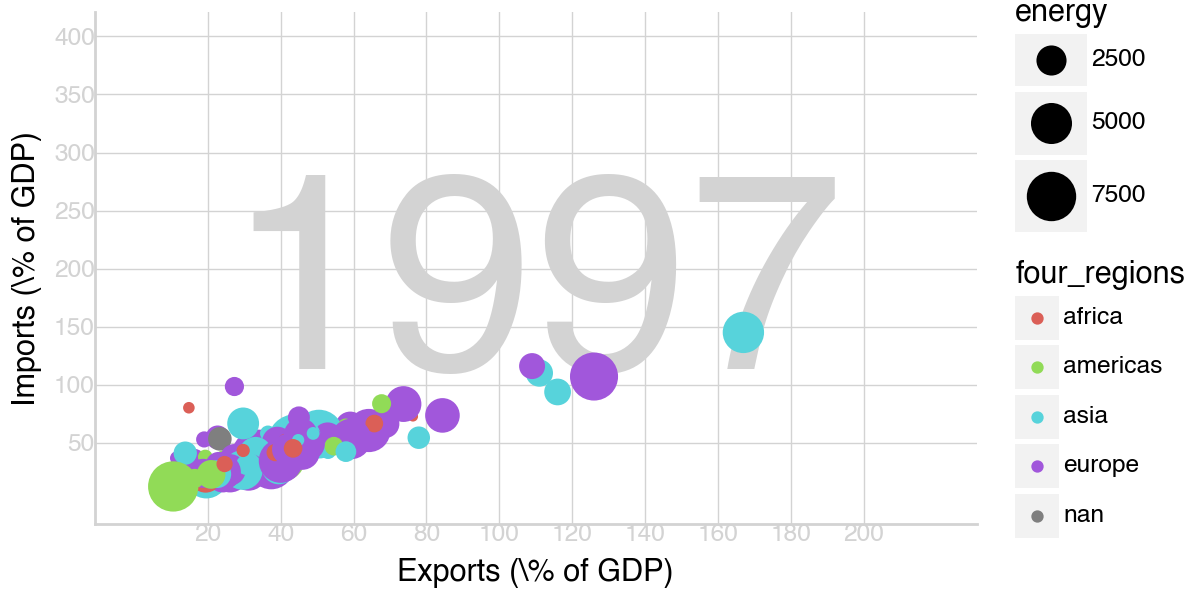

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:677: UserWarning: Glyph 9670 (\N{BLACK DIAMOND}) missing from current font.


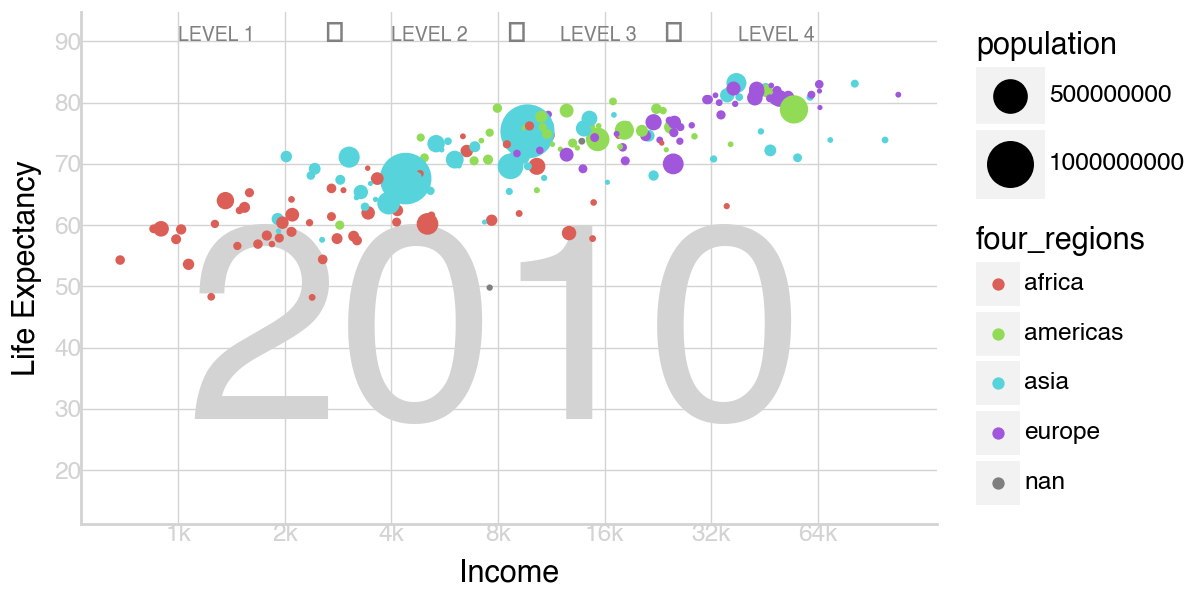

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


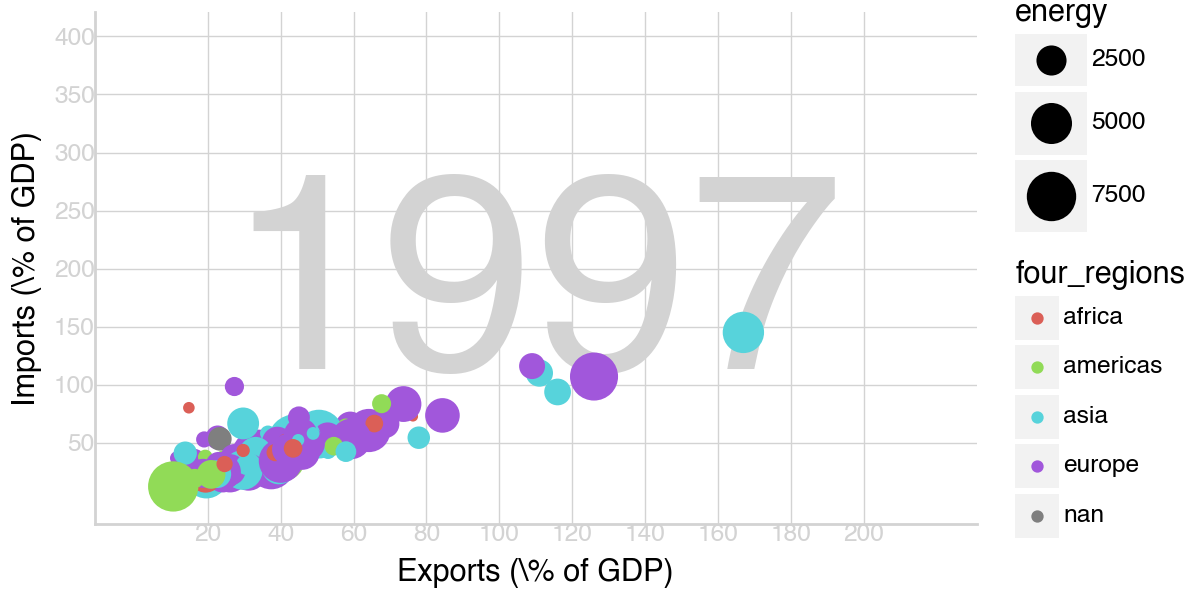

In [102]:
plot2 = (p9.ggplot(data = q2, 
           mapping = p9.aes(x = 'exports',
                            y = 'imports',
                            size = 'energy',
                            color = 'four_regions')) 
   
    #if we put the annotations first, it will put it behind the points
    + annotate('text', x=110, y=175, label='1997', size=100, color='lightgrey', ha='center')

    + p9.geom_point()
    + p9.scale_size(range=(0, 10))

    #x scale
    + scale_x_continuous(
         #sets y access to 10-90
        limits=(0, 220),
        #ensures that it's evenly spaced every 50 units
        breaks=range(20, 220, 20)
    )
    #y scale
    #refrenced chat GPT
    + scale_y_continuous(
        #sets y access to 10-90
        limits=(0, 401),
        #ensures that it's evenly spaced every 50 units
        breaks=range(50, 401, 50)
    )
    #adds x and y titles
    + labs(x = 'Exports (\% of GDP)', y = 'Imports (\% of GDP)')
    + theme(
        #removes all the small lines
        panel_grid_minor=element_blank(),
        # Set background to white
        panel_background=element_rect(fill='white'),  
         # Grey major grid lines
        panel_grid_major=element_line(color='lightgrey', size=0.5),  
        #brings back x axis
        axis_line_x=element_line(color='lightgrey', size=1),
        #brings back y axis
        axis_line_y=element_line(color='lightgrey', size=1),
        # Change x-axis labels to light grey, tried to add margins but it doesn't do anything
        axis_text_x=element_text(color='lightgrey', margin={'b':5}), 
        # Change y-axis labels to light grey 
        axis_text_y=element_text(color='lightgrey', margin={'l':5}),  
        axis_ticks_major=element_blank(),  # Remove major tick marks
        #axis_ticks_minor=element_blank(),  # Remove minor tick marks
        #fixes ratio of image
        figure_size=(6, 3)
    )
)

print(plot2)

**Task 3**

![image info](plots/plot3.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

2. Import the q3data.csv dataset.

3. Recreate the plot as best you can using plotnine.

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.